C:\Users\Deluxe\Anaconda2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in divide
C:\Users\Deluxe\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Deluxe\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in absolute


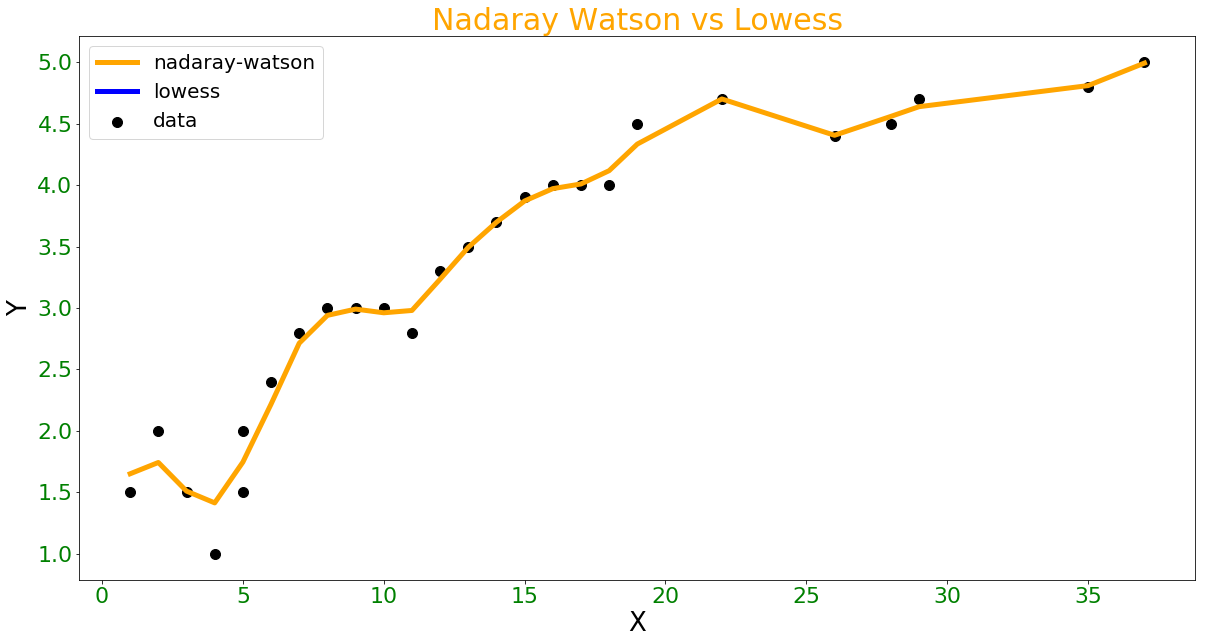

In [24]:
import numpy as np
from scipy.spatial import distance
import pylab as plt
import math

def gauss(r):
    return (2 * math.pi) ** -0.5 * math.exp(-0.5 * r ** 2)

def quartic(r):
    return 15/16 * (1 - r ** 2) ** 2 * (abs(r) <= 1)

def draw():
    plt.xticks(fontsize=22,color='green')
    plt.yticks(fontsize=22,color='green')
    plt.rcParams["figure.figsize"] = [20,10]
    plt.scatter(x, y, label='data', color="black",s=100)
    plt.plot(x, y_nadaray, label='nadaray-watson', color="orange",linewidth=5)
    plt.plot(x, y_lowess, label='lowess', color="blue",linewidth=5)
    plt.xlabel('X', fontsize = 26)
    plt.ylabel('Y',fontsize = 26)
    plt.title('Nadaray Watson vs Lowess', fontsize=30,color="orange")
    plt.legend(loc=2, prop={'size': 20})
    
def nadaray_watson(x, y):
    n = len(x)
    w = []
    for t in range(n):
        w.append([])
        for i in range(n):
            w[t].append(gauss(distance.euclidean(x[t], x[i]) / h))
    w = np.array(w)
    y_nadaray = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)
    return y_nadaray
def lowess(x, y):
    n = len(x)
    gamma = np.ones(n)
    gamma_old = np.zeros(n)
    while np.abs(sum(gamma) - sum(gamma_old))>=eps:
        w = []
        for t in range(n):
            w.append([])
            for i in range(n):
                w[t].append(gauss(distance.euclidean(x[t], x[i]) / h)*gamma[t])
        w = np.array(w)
        y_lowess = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)
        err = np.abs(y_lowess - y)
        gamma_old = gamma[:]
        gamma = [quartic(err[j]) for j in range(n)]
    return y_lowess
h = 0.8
eps = 1e-5
x = np.asarray([1,2,3,4,5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,26,28,29,35,37])
y = np.asarray([1.5,2,1.5,1,1.5,2,2.4,2.8,3,3,3,2.8,3.3,3.5,3.7,3.9,4,4,4,4.5,4.7,4.4,4.5,
                4.7,4.8,5])
y_nadaray = nadaray_watson(x, y)
y_lowess = lowess(x, y)
draw()